# Import data

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('Data/BankChurners.csv')

In [2]:
data = data.drop(data.columns[[21,22]], axis = 1)

In [3]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
data.shape

(10127, 21)

# EDA

In [5]:
import matplotlib.pyplot as plt

import matplotlib as mpl
from cycler import cycler
mpl.style.use('Solarize_Light2')
mpl.rcParams['axes.prop_cycle'] = cycler(color=['#A6DF86', '#FEAE57', '#8AE0CA', '#E06963','#4E5AA6','#a684ab'])


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

## Existing and attrited customers

The main characteristic of this dataset is that we have more information of existing customers than attrited customers


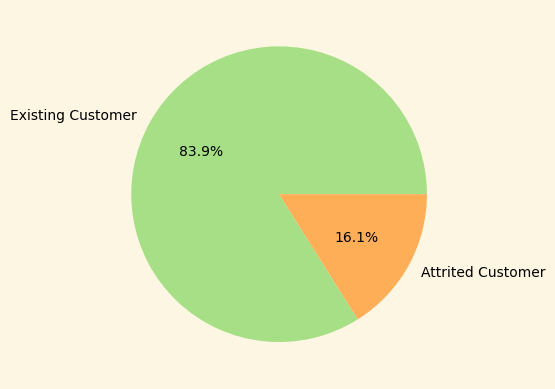

In [7]:
labels = data['Attrition_Flag'].unique()
plt.pie(data['Attrition_Flag'].value_counts(), labels = labels, autopct='%1.1f%%')
plt.show()

## Customer Age

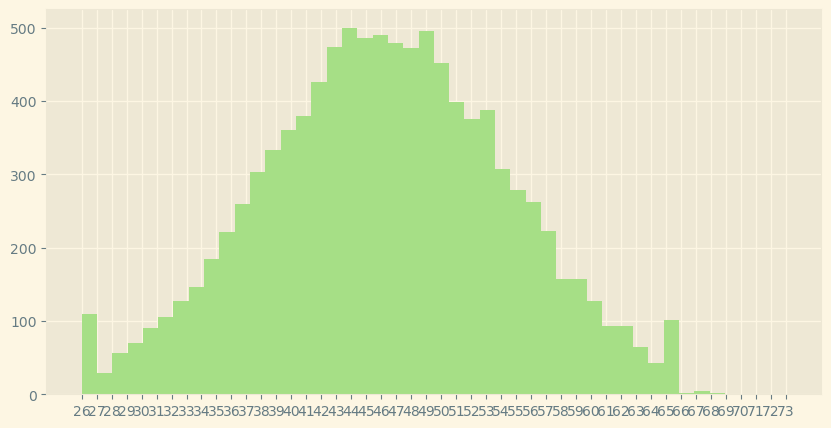

In [8]:
plt.figure(figsize=(10, 5))
plt.hist(data['Customer_Age'], bins = 46 , )
plt.xticks(np.arange(26,74,1))
plt.show()

<Figure size 640x480 with 0 Axes>

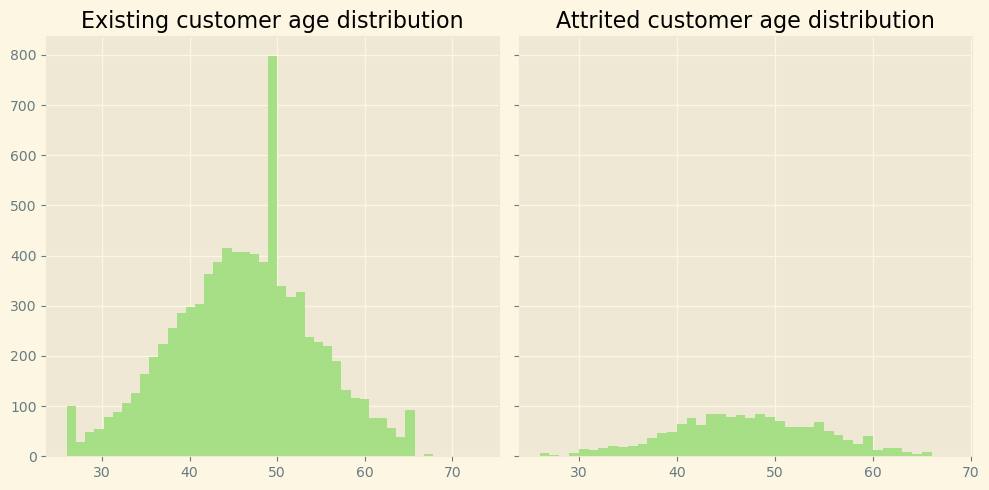

In [9]:
E_customer_age = data.loc[:,['Customer_Age']][data.Attrition_Flag == 'Existing Customer']
A_customer_age = data.loc[:,['Customer_Age']][data.Attrition_Flag != 'Existing Customer']

plt.figure()

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True , figsize = (10,5)  )

axs[0].set_title('Existing customer age distribution')
axs[0].hist(E_customer_age, bins=len(E_customer_age.iloc[:,0].unique()))
axs[1].set_title('Attrited customer age distribution')
axs[1].hist(A_customer_age, bins=len(A_customer_age.iloc[:,0].unique()))

plt.show()

## Gender

If we look upon the gender of the customers in the dataset, it is balanced.

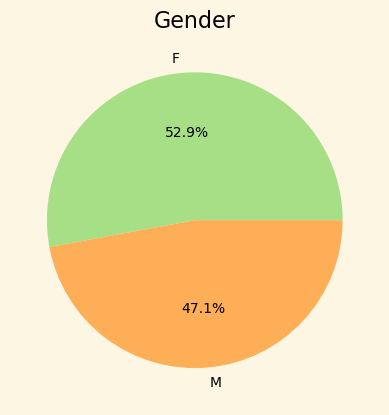

In [10]:
labels = 'F' , 'M'
plt.pie(data['Gender'].value_counts(), labels = labels, autopct='%1.1f%%')
plt.title('Gender')
plt.show()


In [11]:
E_customer_gender = data.loc[:,['Gender']][data.Attrition_Flag == 'Existing Customer']
A_customer_gender = data.loc[:,['Gender']][data.Attrition_Flag != 'Existing Customer']


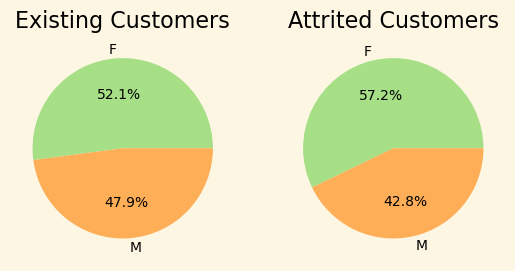

In [12]:
fig, ax = plt.subplots(1,2)
labels = 'F' , 'M'
ax[0].pie(E_customer_gender.iloc[:,0].value_counts(), labels=labels,autopct='%1.1f%%')
ax[1].pie(A_customer_gender.iloc[:,0].value_counts(), labels=labels,autopct='%1.1f%%')
ax[0].set_title('Existing Customers')
ax[1].set_title('Attrited Customers')

plt.show()

## Dependant count

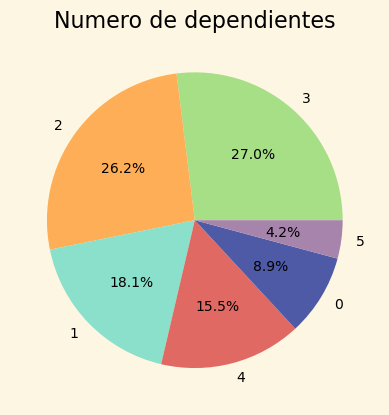

In [13]:
labels = data['Dependent_count'].value_counts().index
plt.pie(data['Dependent_count'].value_counts(), labels = labels, autopct='%1.1f%%')
plt.title('Numero de dependientes')
plt.show()

## Education level

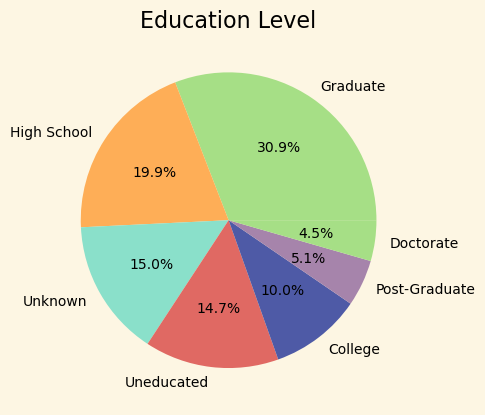

In [14]:
labels = data['Education_Level'].value_counts().index
plt.pie(data['Education_Level'].value_counts(), labels = labels, autopct='%1.1f%%')
plt.title('Education Level')
plt.show()

**In the next Features we want to focus at their distribution**

## Months on book


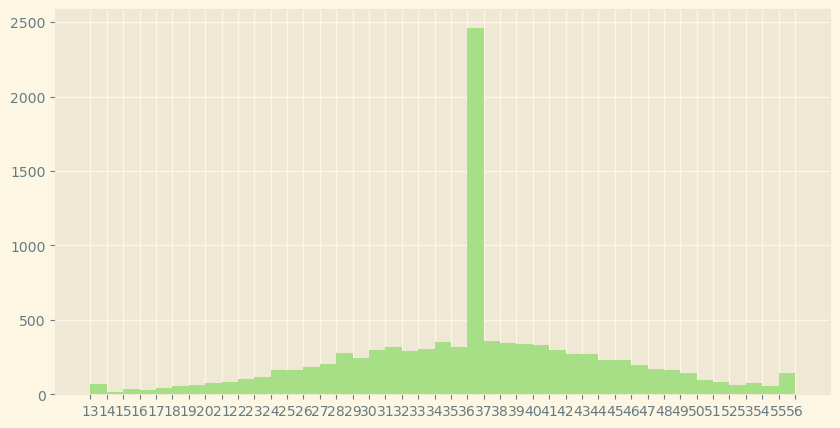

In [15]:
plt.figure(figsize=(10, 5))
plt.hist(data['Months_on_book'], bins = 43 , )
plt.xticks(np.arange(data['Months_on_book'].min(),data['Months_on_book'].max() +1 ,1))
plt.show()

## Total relationship count

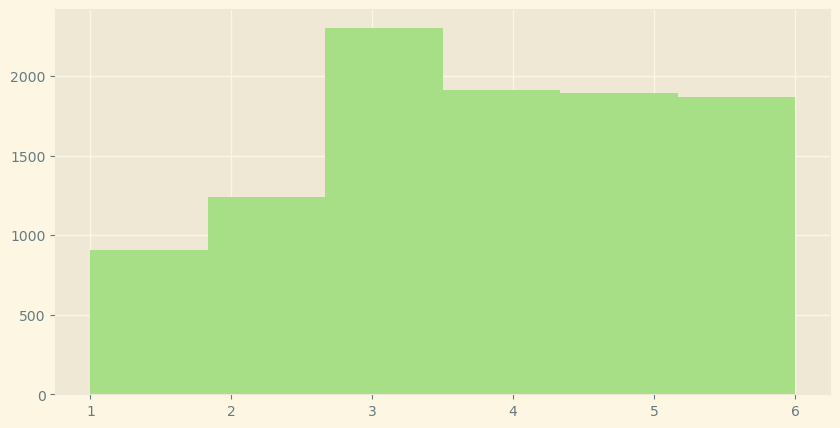

In [16]:
plt.figure(figsize=(10, 5))
plt.hist(data['Total_Relationship_Count'], bins = 6 ,  )
plt.xticks(np.arange(data['Total_Relationship_Count'].min(),data['Total_Relationship_Count'].max() +1 ,1))
plt.show()

## Total_Revolving_Bal

In [17]:
total_rev_cut = pd.cut(data['Total_Revolving_Bal'], 20).value_counts().sort_index()

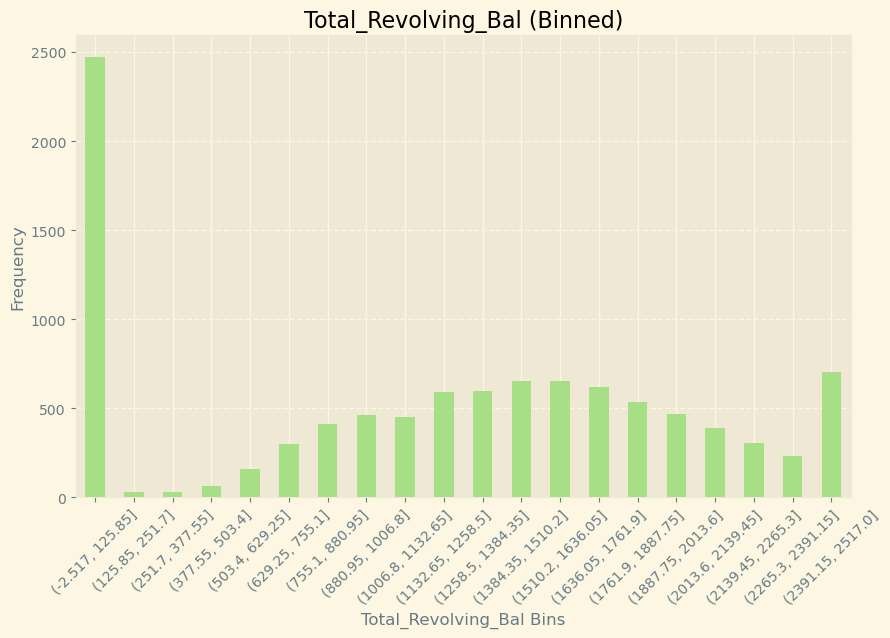

In [18]:
plt.figure(figsize=(10, 6))
total_rev_cut.plot(kind='bar')
plt.title('Total_Revolving_Bal (Binned)')
plt.xlabel('Total_Revolving_Bal Bins')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

## Avg_open_to buy


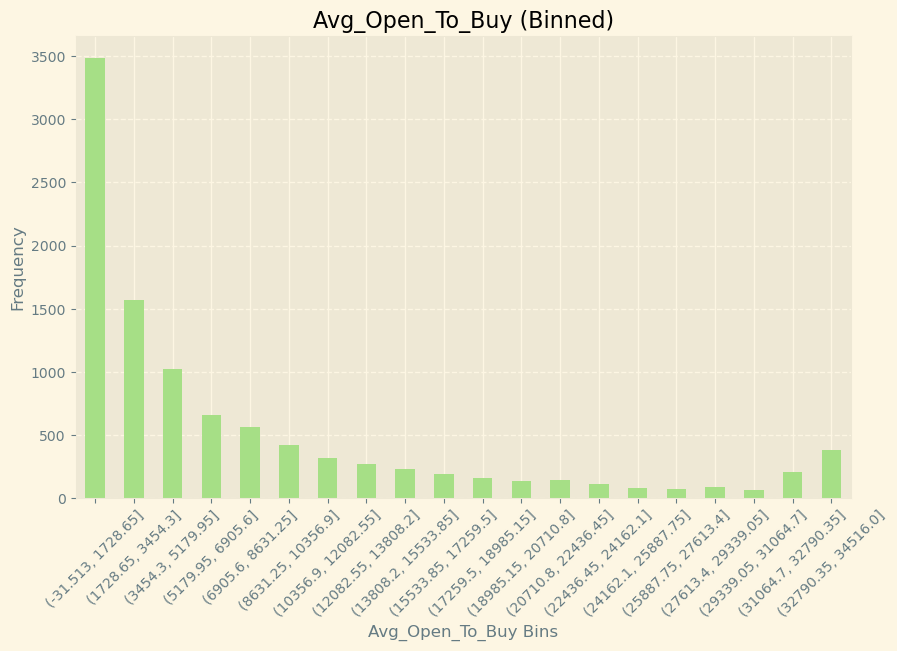

In [19]:
total_rev_cut = pd.cut(data['Avg_Open_To_Buy'], 20).value_counts().sort_index()
plt.figure(figsize=(10, 6))
total_rev_cut.plot(kind='bar')
plt.title('Avg_Open_To_Buy (Binned)')
plt.xlabel('Avg_Open_To_Buy Bins')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

## Total transaction amount

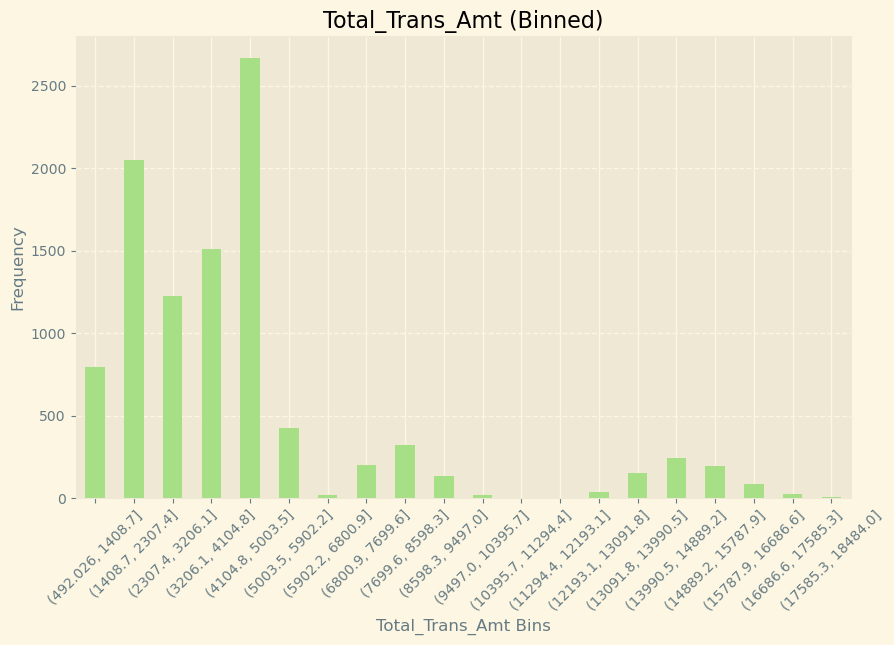

In [20]:
total_rev_cut = pd.cut(data['Total_Trans_Amt'], 20).value_counts().sort_index()
plt.figure(figsize=(10, 6))
total_rev_cut.plot(kind='bar')
plt.title('Total_Trans_Amt (Binned)')
plt.xlabel('Total_Trans_Amt Bins')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

## Total transaction count

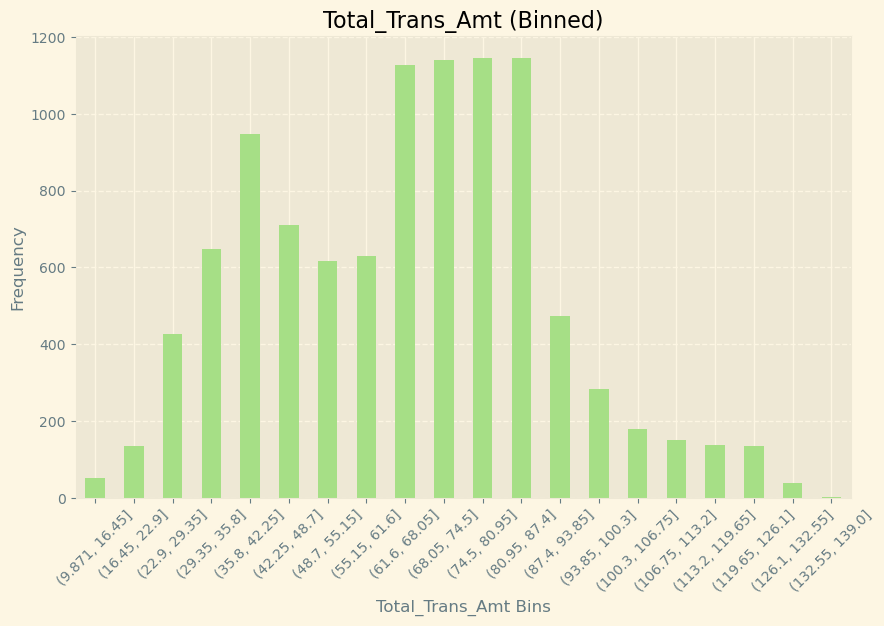

In [21]:
total_rev_cut = pd.cut(data['Total_Trans_Ct'], 20).value_counts().sort_index()
plt.figure(figsize=(10, 6))
total_rev_cut.plot(kind='bar')
plt.title('Total_Trans_Amt (Binned)')
plt.xlabel('Total_Trans_Amt Bins')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

## Columns unique values
Knowing the number of unique values of a column we can identifie categorical attributes and if we can encode them.

In [22]:
columns_unique = []
for i in data.columns:
  columns_unique.append(len(data[i].unique()))
columns_unique_pd = pd.DataFrame({'Column name' : data.columns,'Number of unique values' : columns_unique})
columns_unique_pd

,Column name,Number of unique values
0,CLIENTNUM,10127
1,Attrition_Flag,2
2,Customer_Age,45
3,Gender,2
4,Dependent_count,6
5,Education_Level,7
6,Marital_Status,4
7,Income_Category,6
8,Card_Category,4
9,Months_on_book,44


## Standardization

The numerical attributes have different scale, so we need to see how different are the scales and identifie wich attributes need to be modify in order to be in a similar scale with the others.

For feature scaling we will be using two different approaches:
* Standardization
* Log + Standardization

The follow dataframe with the max and min values for column can give us an idea of the scale of every feature.

To decide the aprouch we need to see the distribution of the attribute values to decide whether we use standarization or log + standarization, we use the second if we have a big max values or a non-gaussian distribution



In [23]:
columns_min = []
columns_max = []
columns_nonobj =['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
for i in columns_nonobj :
  columns_min.append(data[i].min())
  columns_max.append(data[i].max())
columns_min_max = pd.DataFrame({'Column name' : columns_nonobj,
                                'Column min' : columns_min,
                                'Column max' : columns_max})
columns_min_max

,Column name,Column min,Column max
0,CLIENTNUM,708082083.0,8.283431e+08
1,Customer_Age,26.0,7.300000e+01
2,Dependent_count,0.0,5.000000e+00
3,Months_on_book,13.0,5.600000e+01
4,Total_Relationship_Count,1.0,6.000000e+00
5,Months_Inactive_12_mon,0.0,6.000000e+00
6,Contacts_Count_12_mon,0.0,6.000000e+00
7,Credit_Limit,1438.3,3.451600e+04
8,Total_Revolving_Bal,0.0,2.517000e+03
9,Avg_Open_To_Buy,3.0,3.451600e+04


# Data pre process

In [24]:
data_2 = data.drop(['CLIENTNUM'],axis = 1).copy() # Eliminate the column CLIENTNUM
data_2 =data_2[~data_2.isin(['Unknown']).any(axis=1)] #Eliminate Unknown values

## Ordinal encoder

In this part we convert the categories of the categorical attributes from text to numbers.

In [25]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [26]:
#Ordinale encode of the features 
## Attrition_Flag
Att_Flag_cat = ['Existing Customer', 'Attrited Customer']
data_2['Attrition_Flag'] =  OrdinalEncoder(categories=[Att_Flag_cat]).fit_transform(data_2.loc[:,'Attrition_Flag':'Attrition_Flag'])
## Gender
data_2['Gender'] = ordinal_encoder.fit_transform(data_2.loc[:,'Gender':'Gender'])
Gender_cat = ordinal_encoder.categories_
## Income
income_cat = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K','$120K +']
data_2['Income_Category'] = OrdinalEncoder(categories=[income_cat]).fit_transform(data_2.loc[:,'Income_Category':'Income_Category'])
## Education Level
edu_level_cat = ['Uneducated','High School','College', 'Graduate','Post-Graduate', 'Doctorate']
data_2['Education_Level'] = OrdinalEncoder(categories=[edu_level_cat]).fit_transform(data_2.loc[:,'Education_Level':'Education_Level'])
## Card categories
card_cat_cat = ['Blue', 'Gold', 'Silver', 'Platinum']
data_2['Card_Category'] = OrdinalEncoder(categories=[card_cat_cat]).fit_transform(data_2.loc[:,'Card_Category':'Card_Category'])
## Marital status
marital_st_cat = ['Single','Married','Divorced']
data_2['Marital_Status'] = OrdinalEncoder(categories=[marital_st_cat]).fit_transform(data_2.loc[:,'Marital_Status':'Marital_Status'])

## Feature Scaling

Previously we talked about two approaches for feauture scaling, in this part those are implemented.

Also we split the data set in two, the train and the test set to implement the standardization.

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_2.iloc[:,1:],
                                                    data_2['Attrition_Flag'],
                                                    test_size = 0.33,
                                                    random_state = 42)

In [28]:
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.pipeline import Pipeline


std_log_pipe = Pipeline([
    ('log', FunctionTransformer(np.log)),  # Pipeline for "Log + Standardization"
    ('scaler', StandardScaler())  
])

std_pipe = Pipeline([
    ('scaler', StandardScaler()) # Pipeline for "Standardization"
])
X_train[['Credit_Limit','Avg_Open_To_Buy','Total_Trans_Amt']] = std_log_pipe.fit_transform(X_train[['Credit_Limit','Avg_Open_To_Buy','Total_Trans_Amt']])
X_test[['Credit_Limit','Avg_Open_To_Buy','Total_Trans_Amt']] = std_log_pipe.transform(X_test[['Credit_Limit','Avg_Open_To_Buy','Total_Trans_Amt']])
X_train[['Total_Revolving_Bal','Total_Trans_Ct']] = std_pipe.fit_transform(X_train[['Total_Revolving_Bal','Total_Trans_Ct']])
X_test[['Total_Revolving_Bal','Total_Trans_Ct']] = std_pipe.transform(X_test[['Total_Revolving_Bal','Total_Trans_Ct']])

# Model selection and evaluation

We need to be sure if the model we are using is the best for our case, so in order to get the best model it is important to train and evaluate different models.

To evaluate models, because this is a binary classification problem, we'll be using the follow metrics.

* F1 Score
* Precision/Recall Scores
* Confusion Matrix
* ROC AUC Score

## Machine Learning models

In [29]:
from sklearn.linear_model import LogisticRegression, SGDClassifier,LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict , cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix , roc_auc_score, roc_auc_score ,  ConfusionMatrixDisplay


In [30]:
LR = LogisticRegression(solver='liblinear', class_weight= 'balanced')
LR.fit(X_train,y_train)


LogisticRegression(class_weight='balanced', solver='liblinear')

In [31]:
SVC = SVC(class_weight = 'balanced')
SVC.fit(X_train,y_train)

SVC(class_weight='balanced')

In [32]:
SGD = SGDClassifier(class_weight= 'balanced')
SGD.fit(X_train,y_train)

SGDClassifier(class_weight='balanced')

In [33]:
f1_score_LR = cross_val_score(LR, X_train, y_train, cv=5, scoring="f1")
f1_score_SVC = cross_val_score(SVC, X_train, y_train, cv=5, scoring="f1")
f1_score_SGD = cross_val_score(SGD, X_train, y_train, cv=5, scoring="f1")


In [34]:
f1_score_SVC , f1_score_LR, f1_score_SGD

(array([0.5952381 , 0.55050505, 0.5462754 , 0.54814815, 0.54590571]),
 array([0.65174129, 0.65454545, 0.6300716 , 0.61809045, 0.64248705]),
 array([0.66420664, 0.63610315, 0.53382084, 0.3030303 , 0.58351893]))

As we can see this models have a poor performance.

### Confusion Matrix

In [35]:
y_train_pred_LR = cross_val_predict(LR, X_train, y_train, cv=3)
y_train_pred_SVC = cross_val_predict(SVC, X_train, y_train, cv=3)
y_train_pred_SGD = cross_val_predict(SGD, X_train, y_train, cv=3)

In [36]:
CM_LR = confusion_matrix(y_train, y_train_pred_LR)
CM_SVC = confusion_matrix(y_train, y_train_pred_SVC)
CM_SGD = confusion_matrix(y_train, y_train_pred_SGD)


In [37]:
LR.classes_

array([0., 1.])

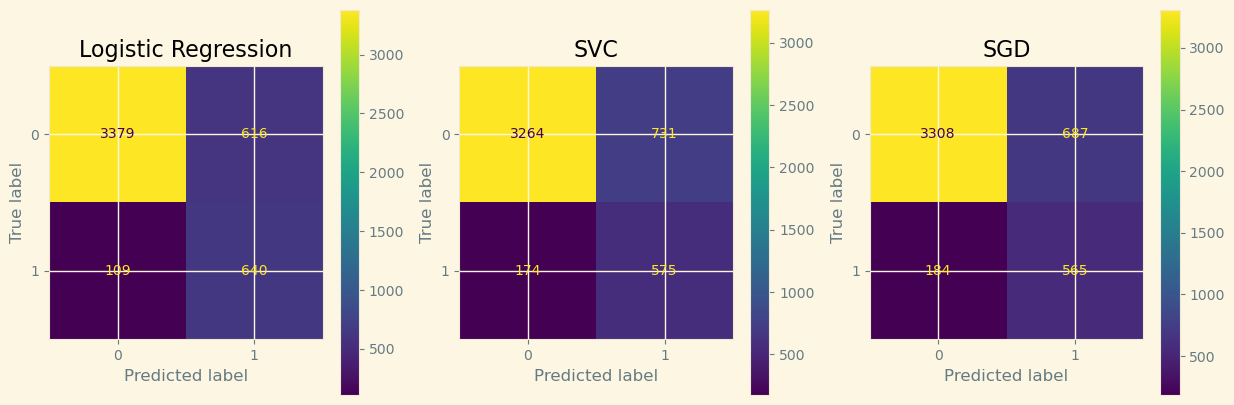

In [38]:
fig, (ax1, ax2 , ax3) = plt.subplots(1, 3, figsize=(15, 5))
labels = [1,0]
disp1 = ConfusionMatrixDisplay(confusion_matrix = CM_LR )
disp2 = ConfusionMatrixDisplay(confusion_matrix = CM_SVC )
disp3 = ConfusionMatrixDisplay(confusion_matrix = CM_SGD )
disp1.plot(ax = ax1)
disp2.plot(ax = ax2)
disp3.plot(ax = ax3)
ax1.set_title('Logistic Regression') , ax2.set_title('SVC') , ax3.set_title('SGD')

plt.show()


## Focal Loss

In [39]:
import torch
import torch.nn as nn
import torchvision

X_train_t = torch.from_numpy(X_train.values).type(torch.float)
y_train_t = torch.from_numpy(y_train.values).type(torch.float)
X_test_t = torch.from_numpy(X_test.values).type(torch.float)
y_test_t = torch.from_numpy(y_test.values).type(torch.float)

In [40]:

class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha 
        self.gamma = gamma  
        self.reduction = reduction

    def forward(self, inputs, targets):
        
        BCE_loss = nn.functional.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        
        # Compute pt (model confidence on true class)
        pt = torch.exp(-BCE_loss)
        
        # Apply the focal adjustment
        focal_loss = self.alpha * (1 - pt) ** self.gamma * BCE_loss

        # Apply reduction (mean, sum, or no reduction)
        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

### Regresión Logistica

In [41]:
class LogisticRegression_torch(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=19, out_features= 1)
    
    def forward(self,x):
        return self.linear(x)

LR_torch = LogisticRegression_torch()
        

In [42]:
loss_fn = FocalLoss(alpha = 0.25, gamma = 2.8)

optimizer = torch.optim.AdamW(LR_torch.parameters(), lr=1e-4, weight_decay=5e-2)



#### training


In [43]:

# Loop de entrenamiento
torch.manual_seed(42)

epochs = 5000

for epoch in range(epochs):
    ### Modo entrenamiento
    LR_torch.train()
    # Forward pass
    y_logits = LR_torch(X_train_t).squeeze()
    #Calcular Loss
    loss = loss_fn(y_logits, y_train_t)
    
    #Loss backward
    loss.backward()
    
    #Optimizer step
    optimizer.step()

    #Optimizer
    optimizer.zero_grad()
    
    if (epoch + 1) % 10 == 0 :
        print(f"epoch : {epoch + 1} | loss : {loss.item() : 4f}")

epoch : 10 | loss :  0.259288
epoch : 20 | loss :  0.255103
epoch : 30 | loss :  0.250907
epoch : 40 | loss :  0.246700
epoch : 50 | loss :  0.242480
epoch : 60 | loss :  0.238246
epoch : 70 | loss :  0.233997
epoch : 80 | loss :  0.229732
epoch : 90 | loss :  0.225450
epoch : 100 | loss :  0.221150
epoch : 110 | loss :  0.216830
epoch : 120 | loss :  0.212491
epoch : 130 | loss :  0.208130
epoch : 140 | loss :  0.203747
epoch : 150 | loss :  0.199340
epoch : 160 | loss :  0.194909
epoch : 170 | loss :  0.190452
epoch : 180 | loss :  0.185969
epoch : 190 | loss :  0.181458
epoch : 200 | loss :  0.176920
epoch : 210 | loss :  0.172353
epoch : 220 | loss :  0.167758
epoch : 230 | loss :  0.163134
epoch : 240 | loss :  0.158481
epoch : 250 | loss :  0.153801
epoch : 260 | loss :  0.149095
epoch : 270 | loss :  0.144365
epoch : 280 | loss :  0.139613
epoch : 290 | loss :  0.134843
epoch : 300 | loss :  0.130059
epoch : 310 | loss :  0.125265
epoch : 320 | loss :  0.120469
epoch : 330 | los

#### Test

In [73]:
LR_torch.eval()
with torch.inference_mode():
    y_logits = LR_torch(X_test_t)
    y_preds = torch.sigmoid(y_logits).round()

In [74]:
f1_score(y_test_t,y_preds)

0.45714285714285713

In [75]:
y_test.value_counts()

Attrition_Flag
0.0    1973
1.0     364
Name: count, dtype: int64

In [76]:
confusion_matrix(y_test,y_preds)

array([[1932,   41],
       [ 244,  120]])

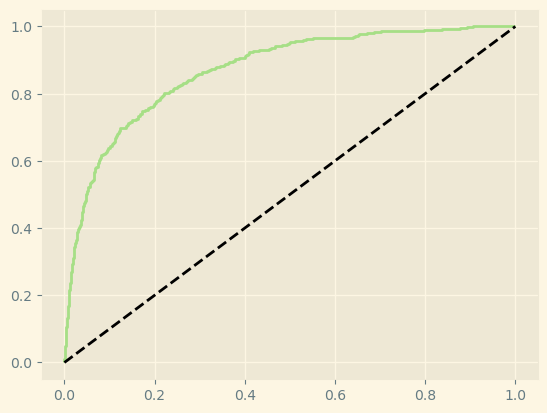

In [77]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_logits)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    [...] # Add axis labels and grid
plot_roc_curve(fpr, tpr)
plt.show()

In [49]:
from sklearn.metrics import roc_auc_score , recall_score, precision_score
roc_auc_score(y_test,y_preds)

0.6544448962087076

In [50]:
recall_score(y_test,y_preds)

0.32967032967032966

In [51]:
precision_score(y_test,y_preds)

0.7453416149068323

In [52]:
f1_score(y_test_t,y_preds)

0.45714285714285713

In [53]:
LR_torch.eval()
with torch.inference_mode():
    y_logits_train = LR_torch(X_train_t)
    y_preds_train = torch.sigmoid(y_logits_train).round()

In [54]:
f1_score(y_train_t,y_preds_train)

0.42441860465116277

In [55]:
from sklearn.metrics import precision_recall_curve

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_train, y_logits_train)


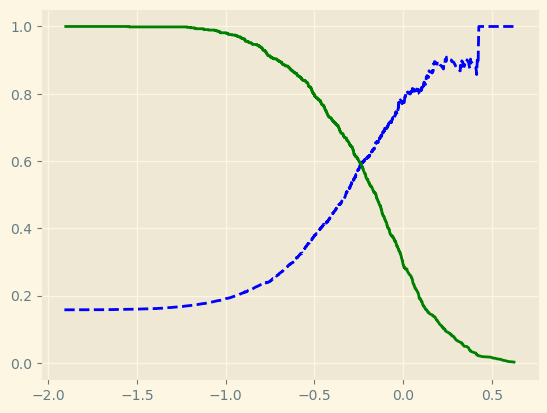

In [56]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    [...] # highlight the threshold, add the legend, axis label and grid
plot_precision_recall_vs_threshold(precision, recall, thresholds)
plt.show()

In [57]:
custom_threshold = 0.3  # Example (replace with your optimal threshold)
y_pred_custom = (y_logits_train >= custom_threshold).type(torch.uint8) 
y_pred_custom_test = (y_logits >= custom_threshold).type(torch.uint8) 

In [58]:
y_pred_custom

tensor([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]], dtype=torch.uint8)

In [59]:
confusion_matrix(y_train,y_pred_custom)

array([[3988,    7],
       [ 699,   50]])

In [60]:
confusion_matrix(y_test,y_pred_custom_test)

array([[1967,    6],
       [ 342,   22]])

In [61]:
f1_score(y_train,y_pred_custom)

0.12406947890818859

In [62]:
precision_score(y_train,y_pred_custom) , recall_score(y_train,y_pred_custom)

(0.8771929824561403, 0.06675567423230974)

### Neural Network

In [63]:
# Build a moel with non linear activation
from torch import nn
class ModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 19, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
    self.relu = nn.ReLU()
  def forward(self,x):
    # Where should we put our non linear actv function?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
nnModel = ModelV2()
nnModel

ModelV2(
  (layer_1): Linear(in_features=19, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [64]:
loss_fn = FocalLoss(alpha = 0.25, gamma = 2.8)

optimizer = torch.optim.AdamW(nnModel.parameters(), lr=1e-3, weight_decay=5e-2)

In [65]:

# Loop de entrenamiento
torch.manual_seed(42)

epochs = 5000

for epoch in range(epochs):
    ### Modo entrenamiento
    nnModel.train()
    # Forward pass
    y_logits = nnModel(X_train_t).squeeze()
    #Calcular Loss
    loss = loss_fn(y_logits, y_train_t)
    
    #Loss backward
    loss.backward()
    
    #Optimizer step
    optimizer.step()

    #Optimizer
    optimizer.zero_grad()
    
    if (epoch + 1) % 10 == 0 :
        print(f"epoch : {epoch + 1} | loss : {loss.item() : 4f}")

epoch : 10 | loss :  0.129563
epoch : 20 | loss :  0.053169
epoch : 30 | loss :  0.032498
epoch : 40 | loss :  0.025663
epoch : 50 | loss :  0.021670
epoch : 60 | loss :  0.019355
epoch : 70 | loss :  0.018204
epoch : 80 | loss :  0.017755
epoch : 90 | loss :  0.017542
epoch : 100 | loss :  0.017388
epoch : 110 | loss :  0.017257
epoch : 120 | loss :  0.017142
epoch : 130 | loss :  0.017042
epoch : 140 | loss :  0.016957
epoch : 150 | loss :  0.016887
epoch : 160 | loss :  0.016829
epoch : 170 | loss :  0.016782
epoch : 180 | loss :  0.016743
epoch : 190 | loss :  0.016711
epoch : 200 | loss :  0.016684
epoch : 210 | loss :  0.016660
epoch : 220 | loss :  0.016638
epoch : 230 | loss :  0.016617
epoch : 240 | loss :  0.016597
epoch : 250 | loss :  0.016577
epoch : 260 | loss :  0.016557
epoch : 270 | loss :  0.016537
epoch : 280 | loss :  0.016517
epoch : 290 | loss :  0.016497
epoch : 300 | loss :  0.016477
epoch : 310 | loss :  0.016457
epoch : 320 | loss :  0.016436
epoch : 330 | los

#### Test

In [66]:
nnModel.eval()
with torch.inference_mode():
    y_logits_nn =nnModel(X_test_t)
    y_preds_nn = torch.sigmoid(y_logits_nn).round()

In [67]:
confusion_matrix(y_test,y_preds_nn)

array([[1887,   86],
       [  99,  265]])

In [68]:
f1_score(y_test, y_preds_nn)

0.7412587412587412

In [69]:
recall_score(y_test, y_preds_nn)

0.728021978021978

In [70]:
precision_score(y_test, y_preds_nn)

0.7549857549857549

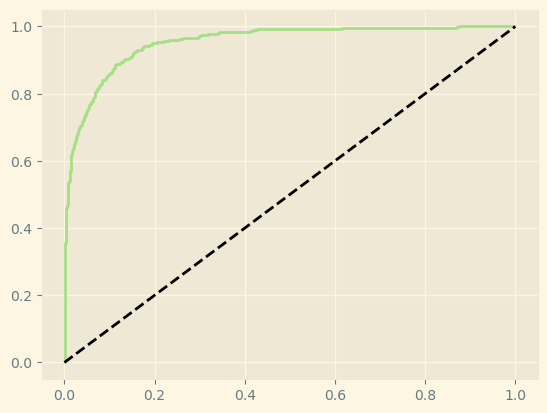

In [71]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_logits_nn)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    [...] # Add axis labels and grid
plot_roc_curve(fpr, tpr)
plt.show()